In [1]:
#importing modules
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#Reading dataset(processed_cleveland.csv)
df=pd.read_csv('/kaggle/input/heart-diseases/Heart_disease_cleveland_extended.csv')
#printing starting instances of data set
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [3]:
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)
print(df['target'].value_counts())

target
0    175
1    148
Name: count, dtype: int64


<Axes: xlabel='sex', ylabel='count'>

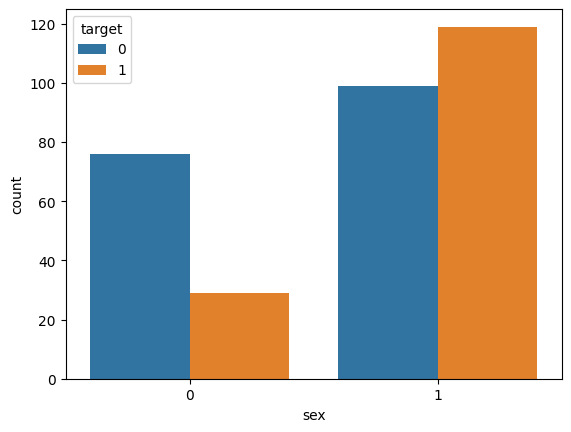

In [4]:
#visualizing how many persons have heartdisease based on gender using heartdisease dataset
sns.countplot(x='sex',hue='target',data=df)


<Axes: xlabel='cp', ylabel='count'>

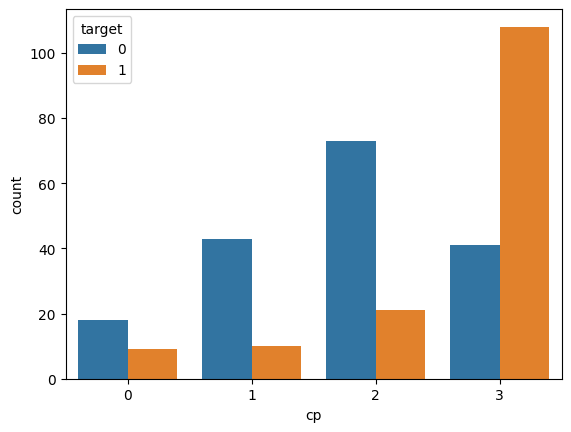

In [5]:
#visualizing how many persons have heart disease based on type of chest pain
sns.countplot(x='cp',hue='target',data=df)

In [6]:

#preprocessing data i.e. finding null values;
df.isna().sum()
#if we have null values we drop them using following command
#df.dropna()

x=df[['age','sex','trestbps','chol','cp']]
y=df['target']
x.shape,y.shape


((323, 5), (323,))

In [7]:
# spliting data for trainig and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=0)


In [8]:
#training the data and predicting accuracy using logistic regression
from sklearn.linear_model import LogisticRegression
logreg =LogisticRegression(class_weight='balanced')
sd=logreg.fit(X_train,y_train)
sd.score(X_train,y_train)
#a = sd.predict(X_test)
#d_log = pd.DataFrame(data=a)
#d_log.rename(index=str, columns={0:"y_log"})
logreg.score(X_test,y_test)


0.7422680412371134

In [9]:
train_accuracy_logreg = logreg.score(X_train, y_train)
test_accuracy_logreg = logreg.score(X_test, y_test)

print("Logistic Regression Training Accuracy:", train_accuracy_logreg)
print("Logistic Regression Test Accuracy:", test_accuracy_logreg)


Logistic Regression Training Accuracy: 0.7433628318584071
Logistic Regression Test Accuracy: 0.7422680412371134


In [10]:
#testing against new samples
a=np.array([63,1,3,145,233])
b=a.reshape(1,5)
df=pd.DataFrame(b)
df. shape


(1, 5)

In [11]:
#predicting whether a person have heart disease or not against new sample
sd.predict(df)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [12]:
from sklearn.ensemble import RandomForestClassifier


from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train,y_train)


rf.fit(X_train, y_train)
train_accuracy = rf.score(X_train, y_train)
test_accuracy = rf.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 1.0
Test Accuracy: 0.6701030927835051


In [13]:
from sklearn.model_selection import cross_val_score

logreg_cv = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')
rf_cv = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

print("Logistic Regression CV Accuracy:", logreg_cv.mean())
print("Random Forest CV Accuracy:", rf_cv.mean())


Logistic Regression CV Accuracy: 0.7165217391304347
Random Forest CV Accuracy: 0.7612560386473429


In [14]:
import numpy as np

# Example new sample: [age, sex, trestbps, chol, cp]
sample_data = np.array([45, 1, 130, 233, 1])  # Example input
sample_data = sample_data.reshape(1, -1)  # Reshape for prediction

# Logistic Regression Prediction
logreg_pred = logreg.predict(sample_data)
logreg_prob = logreg.predict_proba(sample_data)

print("Logistic Regression Prediction (0: No Heart Disease, 1: Heart Disease):", logreg_pred[0])
#print("Logistic Regression Probabilities [No Heart Disease, Heart Disease]:", logreg_prob[0])



Logistic Regression Prediction (0: No Heart Disease, 1: Heart Disease): 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [15]:
# Random Forest Prediction
rf_pred = rf.predict(sample_data)
rf_prob = rf.predict_proba(sample_data)

print("Random Forest Prediction (0: No Heart Disease, 1: Heart Disease):", rf_pred[0])
#print("Random Forest Probabilities [No Heart Disease, Heart Disease]:", rf_prob[0])


Random Forest Prediction (0: No Heart Disease, 1: Heart Disease): 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
